In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import os
import cv2

In [3]:
#Can only try 4,5 or 6 for i

i=4
#files=sorted(glob("/home/abubakr/Desktop/*sync*csv"))
#files=sorted(glob("processed_data/*26*/"+str(i)+"*/*sync*csv"))
files=sorted(glob("/home/*/Desktop/*sync*csv"))
files

['/home/uwr/Desktop/14Feb_2024_02_14_08_23_33_sync.csv',
 '/home/uwr/Desktop/14Feb_2024_02_14_08_23_33_sync_imu.csv']

In [4]:
df1=pd.read_csv(files[0])
df2=pd.read_csv(files[1])

In [5]:
files[6]

IndexError: list index out of range

In [6]:
df1["Timestamp"]=np.array(df1["Timestamp"]/np.power(10,9),np.float128)
df1.head()


,Timestamp,Pose_X,Pose_Y,Pose_Z,Sonar_Distance_1,Sonar_Distance_2,Sonar_Distance_3,IMU_Linear_Acc_X,IMU_Linear_Acc_Y,IMU_Linear_Acc_Z
0,1.706236e+09,-0.000038,-0.000014,-0.000038,-0.174877,0.0,0.0,0.001257,-0.006476,-0.013599
1,1.706236e+09,-1.680688,-0.000049,-0.000081,0.156415,0.0,0.0,0.000429,-0.004435,-0.021529
2,1.706236e+09,-1.592235,-0.000017,-0.000092,0.818667,0.0,0.0,-0.002228,-0.002559,-0.019419
3,1.706236e+09,-3.165296,-0.000051,-0.000165,0.821000,0.0,0.0,0.001367,-0.001440,-0.007555
4,1.706236e+09,-2.118342,-0.000009,-0.000008,0.823667,0.0,0.0,-0.003852,0.001321,-0.000341


In [7]:
df2["Timestamp"]=np.array(df2["Timestamp"]/np.power(10,9),np.float128)
df2.head()

,Timestamp,IMU_Raw_x,IMU_Raw_y,IMU_Raw_z,IMU_Linear_Acc_X,IMU_Linear_Acc_Y,IMU_Linear_Acc_Z
0,1.706236e+09,0.107599,9.768851,-0.982107,-0.000713,-0.003081,0.000281
1,1.706236e+09,0.101487,9.768181,-0.990177,-0.002107,-0.002263,0.002636
2,1.706236e+09,0.099575,9.773252,-0.998623,-0.001993,-0.001822,0.002515
3,1.706236e+09,0.093412,9.775958,-0.995065,-0.001991,-0.001371,0.001294
4,1.706236e+09,0.098534,9.764812,-0.996236,-0.002543,-0.000811,-0.000998


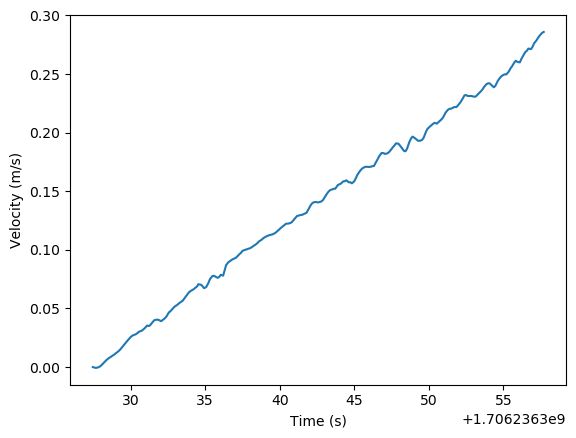

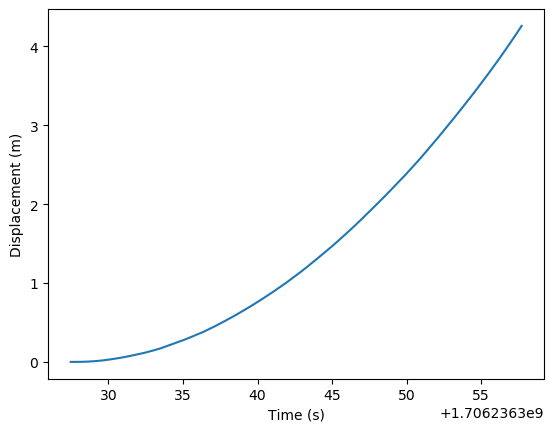

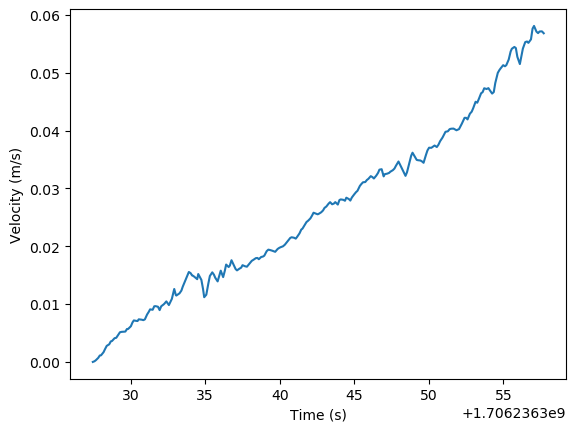

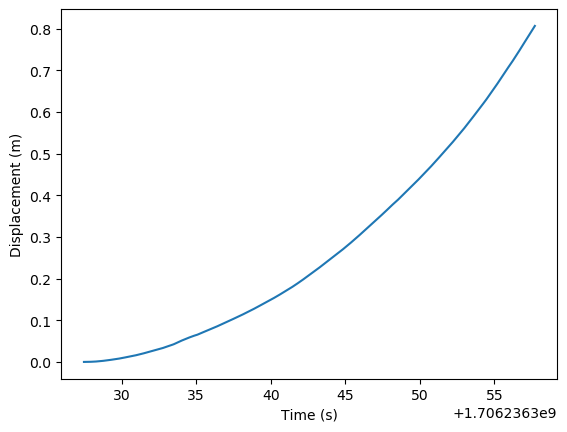

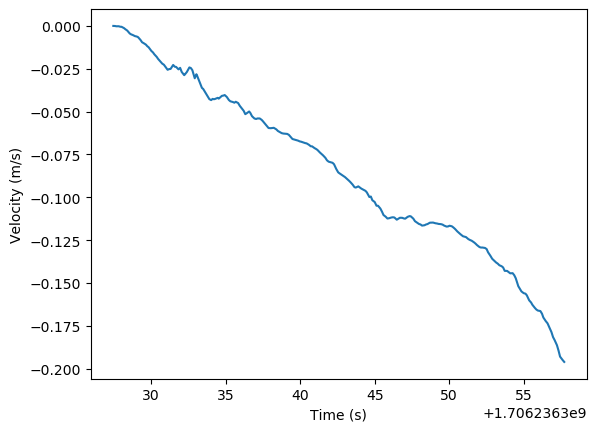

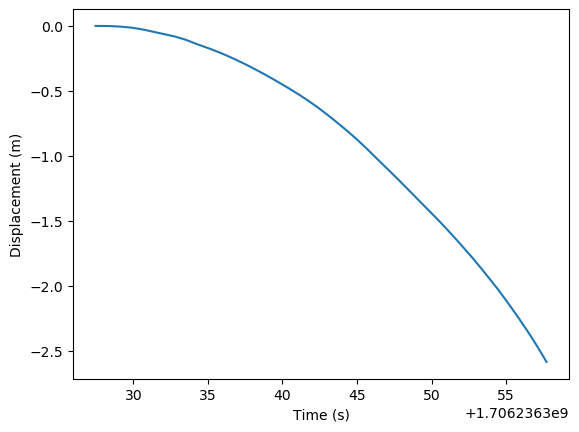

In [8]:
def create_v_d(accs,imus):
    vels=[]
    prev_time=imus.iloc[0]["Timestamp"]
    bias=imus.iloc[0][accs]
    prev_acc=0
    prev_vel=0
    for x in imus.iloc:
    
            #Avg acc * dt = dv
        vel_d=0.5*(prev_acc+x[accs]-bias)*(x["Timestamp"]-prev_time)
        vel=prev_vel+vel_d
        prev_vel=vel
        prev_time=x["Timestamp"]
        vels.append(vel)
    plt.figure()
    plt.ylabel("Velocity (m/s)")
    plt.xlabel("Time (s)")
    plt.plot(np.array(imus.iloc[:]["Timestamp"]),vels)
    i=0
    prev_s=0
    prev_time=imus.iloc[0]["Timestamp"]
    dists=[]
    for x in imus.iloc:
    
            #Avg acc * dt = dv
        s=prev_s+vels[i]*(x["Timestamp"]-prev_time)+0.5*0.5*(prev_acc+x[accs]-bias)*np.square(x["Timestamp"]-prev_time)
        prev_s=s
        prev_vel=vel
        prev_time=x["Timestamp"]
        dists.append(s)
        i+=1
    plt.figure()
    plt.ylabel("Displacement (m)")
    plt.xlabel("Time (s)")
    plt.plot(np.array(imus.iloc[:]["Timestamp"]),dists)
    return vels,dists
z_v,z_d=create_v_d("IMU_Linear_Acc_Z",df1)
y_v,y_d=create_v_d("IMU_Linear_Acc_Y",df1)
x_v,x_d=create_v_d("IMU_Linear_Acc_X",df1)

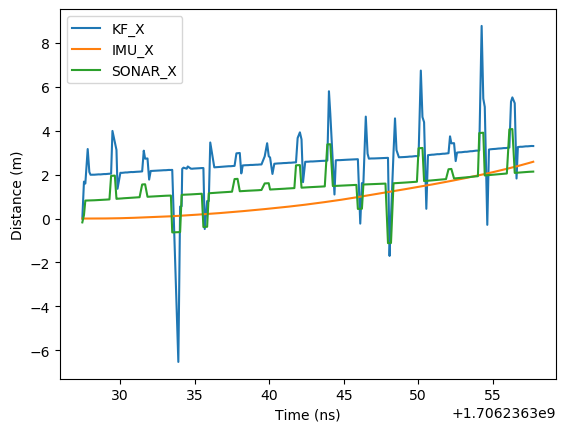

In [9]:
plt.plot(np.array(df1["Timestamp"]),np.array(df1["Pose_X"])*-1)
plt.plot(np.array(df1["Timestamp"]),np.array(x_d)*-1)
plt.plot(np.array(df1["Timestamp"]),np.array(df1["Sonar_Distance_1"]))
plt.legend(["KF_X","IMU_X","SONAR_X"])
plt.ylabel("Distance (m)")
plt.xlabel("Time (ns)")
plt.savefig(str(i)+"_x_kf.png")

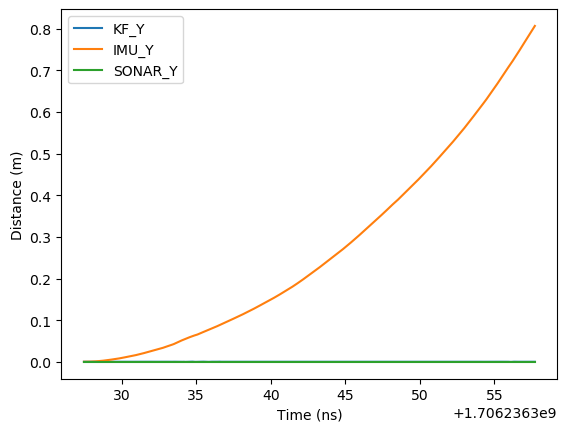

In [10]:
plt.plot(np.array(df1["Timestamp"]),np.array(df1["Pose_Y"]))
plt.plot(np.array(df1["Timestamp"]),np.array(y_d))
plt.plot(np.array(df1["Timestamp"]),np.array(df1["Sonar_Distance_2"]-df1["Sonar_Distance_2"][0]))
plt.legend(["KF_Y","IMU_Y","SONAR_Y"])
plt.ylabel("Distance (m)")
plt.xlabel("Time (ns)")
plt.savefig(str(i)+"_y_kf.png")

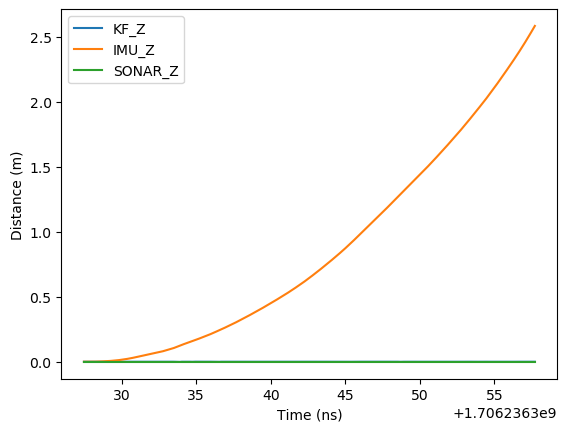

In [11]:
plt.plot(np.array(df1["Timestamp"]),np.array(df1["Pose_Z"])*-1)
plt.plot(np.array(df1["Timestamp"]),np.array(x_d)*-1)
plt.plot(np.array(df1["Timestamp"]),np.array(df1["Sonar_Distance_3"]-df1["Sonar_Distance_3"][0]))
plt.legend(["KF_Z","IMU_Z","SONAR_Z"])
plt.ylabel("Distance (m)")
plt.xlabel("Time (ns)")
plt.savefig(str(i)+"_z_kf.png")

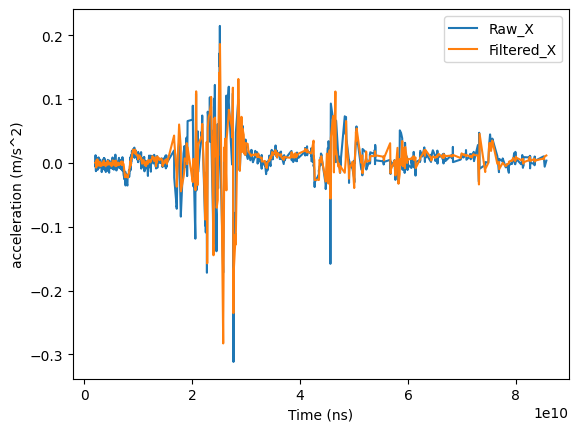

In [21]:
plt.plot(df2["Timestamp"],df2["IMU_Raw_x"]-df2["IMU_Raw_x"][0])
plt.plot(df2["Timestamp"],(df2["IMU_Linear_Acc_X"]-df2["IMU_Linear_Acc_X"][0])*1)
plt.legend(["Raw_X","Filtered_X"])
plt.ylabel("acceleration (m/s^2)")
plt.xlabel("Time (ns)")
plt.savefig(str(i)+"_x_bw.png")

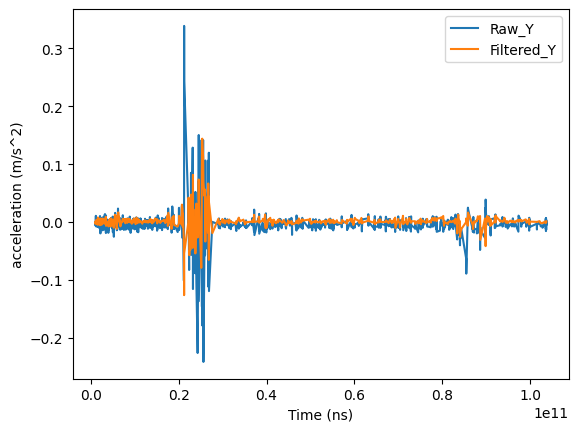

In [11]:
plt.plot(df2["Timestamp"],df2["IMU_Raw_y"]-df2["IMU_Raw_y"][0])
plt.plot(df2["Timestamp"],(df2["IMU_Linear_Acc_Y"]-df2["IMU_Linear_Acc_Y"][0])*1)
plt.legend(["Raw_Y","Filtered_Y"])
plt.ylabel("acceleration (m/s^2)")
plt.xlabel("Time (ns)")
plt.savefig(str(i)+"_y_bw.png")

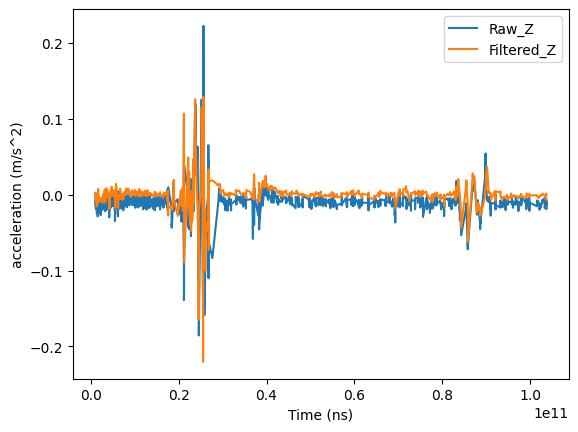

In [12]:
plt.plot(df2["Timestamp"],df2["IMU_Raw_z"]-df2["IMU_Raw_z"][0])
plt.plot(df2["Timestamp"],(df2["IMU_Linear_Acc_Z"]-df2["IMU_Linear_Acc_Z"][0])*1)
plt.legend(["Raw_Z","Filtered_Z"])
plt.ylabel("acceleration (m/s^2)")
plt.xlabel("Time (ns)")
plt.savefig(str(i)+"_z_bw.png")

# Other code

In [159]:
df3=pd.read_csv("/home/abubakr/Desktop/imu.csv")
df4=pd.read_csv("/home/abubakr/Desktop/imu2.csv")

In [92]:
df3.head()

,%time,field.header.seq,field.header.stamp,field.header.frame_id,field.orientation.x,field.orientation.y,field.orientation.z,field.orientation.w,field.orientation_covariance0,field.orientation_covariance1,...,field.linear_acceleration.z,field.linear_acceleration_covariance0,field.linear_acceleration_covariance1,field.linear_acceleration_covariance2,field.linear_acceleration_covariance3,field.linear_acceleration_covariance4,field.linear_acceleration_covariance5,field.linear_acceleration_covariance6,field.linear_acceleration_covariance7,field.linear_acceleration_covariance8
0,1702464251867193783,62,1145229339,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.465410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1702464251870371765,63,1149715423,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.471815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1702464251873468098,64,1167288780,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.479011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1702464251875591263,65,1174196481,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.467270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1702464251877241763,66,1189620733,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.469086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
df4.head()

,%time,field.header.seq,field.header.stamp,field.header.frame_id,field.vector.x,field.vector.y,field.vector.z
0,1702464251867193783,0,1145229339,NaN,-0.002749,0.011357,0.007850
1,1702464251870371765,0,1149715423,NaN,-0.002404,0.011406,0.007854
2,1702464251873468098,0,1167288780,NaN,-0.002086,0.011324,0.008056
3,1702464251875591263,0,1174196481,NaN,-0.001812,0.011153,0.008423
4,1702464251877241763,0,1189620733,NaN,-0.001596,0.010961,0.008897


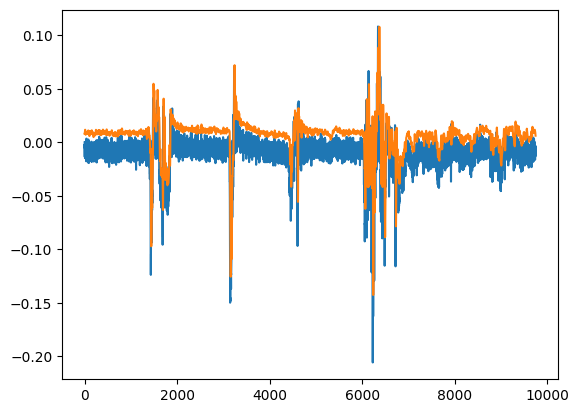

In [94]:
plt.plot(df3["field.linear_acceleration.z"]-df3["field.linear_acceleration.z"][0])
plt.plot(df4["field.vector.z"])

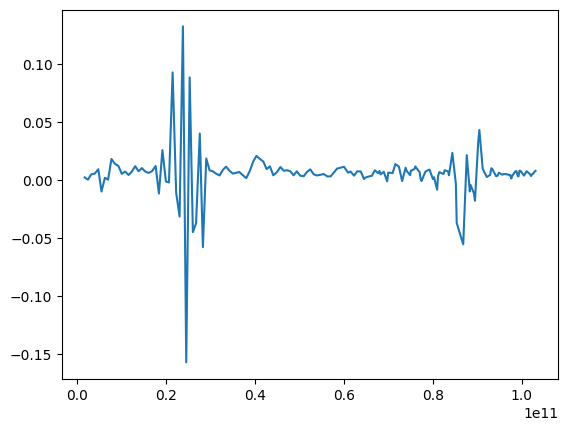

In [174]:
plt.plot(df1["Timestamp"],df1["IMU_Linear_Acc_Z"])

In [96]:
len(df4)

9745

In [97]:
len(df2)

1295